### Shifted Window Transformers (SWIN) Transformer

**SWIN Transformers** adapt the transformer architecture for image analysis by using shifted windows and a hierarchical structure. This allows them to efficiently capture both local and global image features, processing images in overlapping patches to maintain long-range dependencies

#### Architecture

In [32]:

class SwinTransformerModel(nn.Module):
    def __init__(self, num_classes=1):
        super(SwinTransformerModel, self).__init__()
        self.model = timm.create_model('swin_base_patch4_window7_224', pretrained=True)
        self.model.head = nn.Linear(self.model.num_features, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.model.forward_features(x)  
        x = torch.mean(x, dim=[1, 2]) 
        x = self.model.head(x) 
        x = self.sigmoid(x) 
        return x


# Create the model, define the loss and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2 = SwinTransformerModel(num_classes=1).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model2.parameters(), lr=0.00001, weight_decay=1e-5)


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

In [33]:
# Display the model's architecture
print(model2)

SwinTransformerModel(
  (model): SwinTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    )
    (layers): Sequential(
      (0): SwinTransformerStage(
        (downsample): Identity()
        (blocks): Sequential(
          (0): SwinTransformerBlock(
            (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (attn): WindowAttention(
              (qkv): Linear(in_features=128, out_features=384, bias=True)
              (attn_drop): Dropout(p=0.0, inplace=False)
              (proj): Linear(in_features=128, out_features=128, bias=True)
              (proj_drop): Dropout(p=0.0, inplace=False)
              (softmax): Softmax(dim=-1)
            )
            (drop_path1): Identity()
            (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (mlp): Mlp(
              (fc1): Linear(in_features=128, out_feature

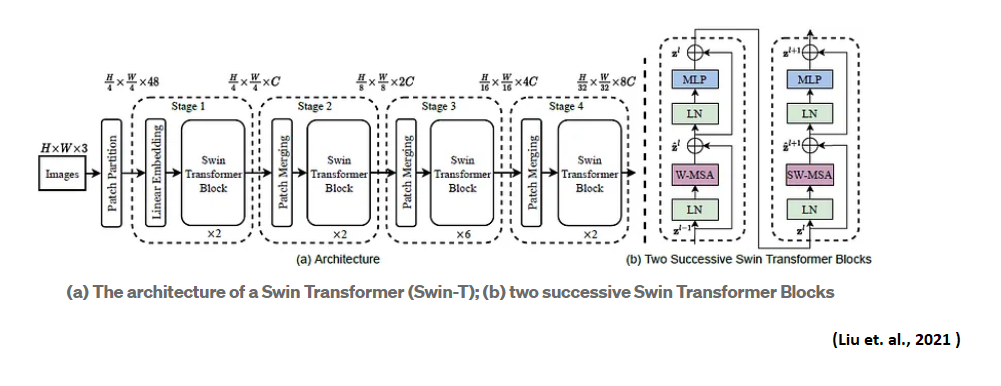